# <b>Heart Disease Prediction Using Machine Learning</b>
<i>A Data Science project for CoderGirl using the <b>Heart Disease UCI dataset</b>: https://www.kaggle.com/ronitf/heart-disease-uci</i>.  

<b>Background</b>  
In its entirety, the Cleveland database contains 76 attributes and classifies patients based on the absence or presence of heart disease. However, for this project, a subset of the following 14 attributes is being used: 
- Age (age in years)
- Sex (0 = female; 1 = male)
- CP (chest pain type)
- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
- CHOL (serum cholesterol in mg/dl)
- FPS (fasting blood sugar > 120 mg/dl) (0 = false; 1 = true)
- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina (0 = no; 1 = yes))
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels (0-3) colored by fluoroscopy)
- THAL (3 = normal; 6 = fixed defect; 7 = reversible defect)
- TARGET (0 = no disease; 1 = heart disease)  

<b>Project</b>  
This mini-project is divided into three phases:
1. Exploratory data analysis
2. Model exploration
3. Presentation
<br/><br/>
***  


## <b>Exploratory Data Analysis</b>

<b>Import Libraries and Load the Data</b>

In [1]:
# import packages for exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the dataset
heart = pd.read_csv('heart.csv')

<br/><b>Get to Know the Data</b>

In [3]:
# see shape of the data
heart.shape

(303, 14)

In [4]:
# view head dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# view tail of dataset
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# get info on dataframe
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


<br/><b>Check for Duplicates</b>

In [7]:
# check for duplicate observations
heart[heart.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
# drop duplicate observation
heart = heart.drop_duplicates()

In [9]:
# verify duplicate was removed
heart[heart.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [10]:
# view updated shape; should be 302 rows with the duplicate removed
heart.shape

(302, 14)

<br/><b>View Statistics</b>

In [11]:
# describe statistical insights
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# groupby target and then view means to see average value for no disease vs. disease
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [13]:
# groupby target and then view medians to see median value for no disease vs. disease
heart.groupby('target').median()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,58.0,1.0,0.0,130.0,249.0,0.0,0.0,142.0,1.0,1.4,1.0,1.0,3.0
1,52.0,1.0,2.0,130.0,234.5,0.0,1.0,161.0,0.0,0.2,2.0,0.0,2.0


<br/><b>Visualize the Data</b>

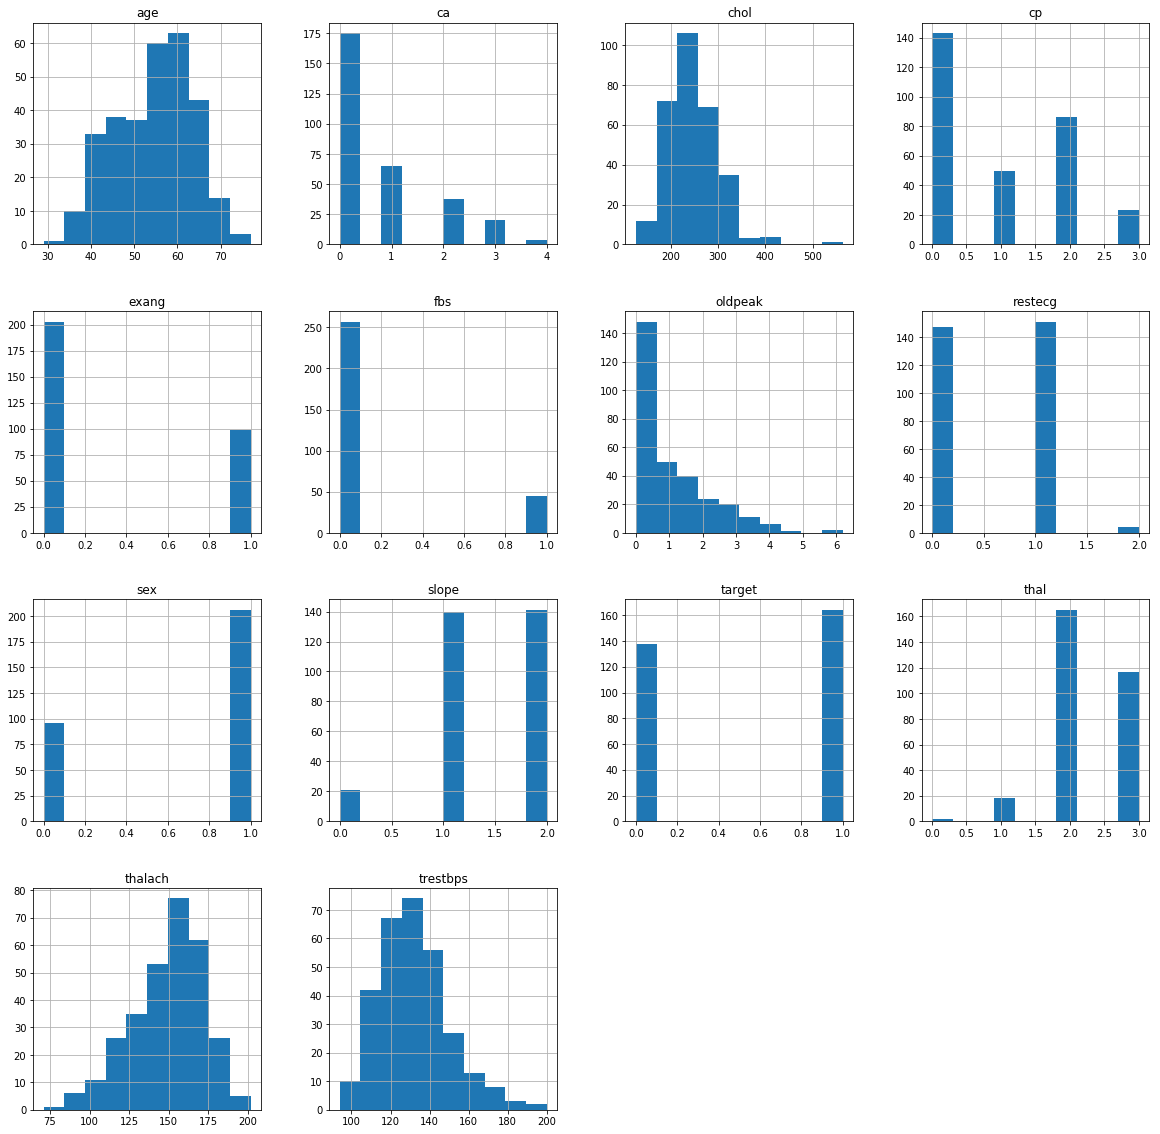

In [14]:
# plot histogram of dataframe
heart.hist(figsize=(20,20));

In [15]:
# generate a correlation matrix
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


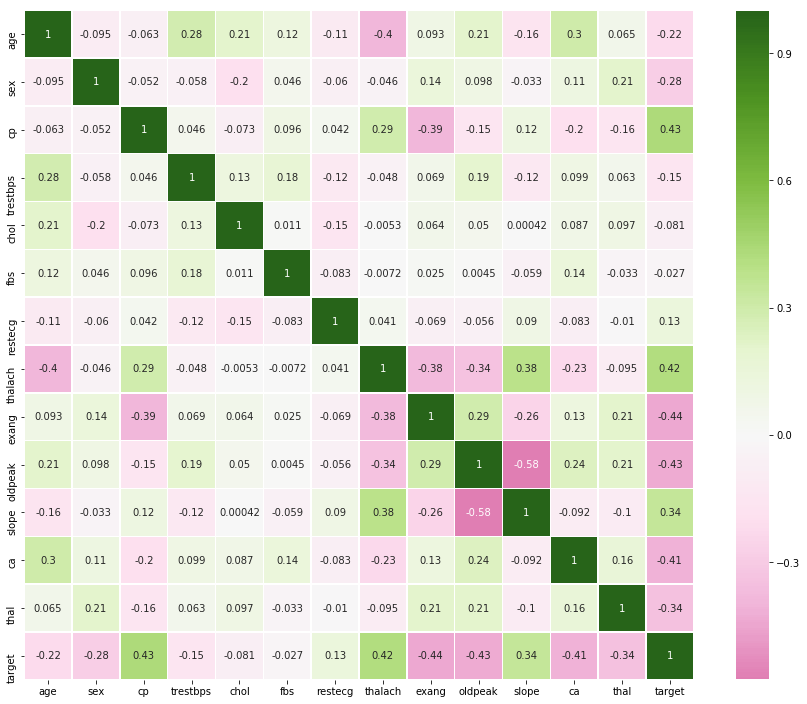

In [16]:
# plot the correlation matrix as a heatmap
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(heart.corr(), annot=True, cmap="PiYG", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .82})

C:\Users\veron\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\veron\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


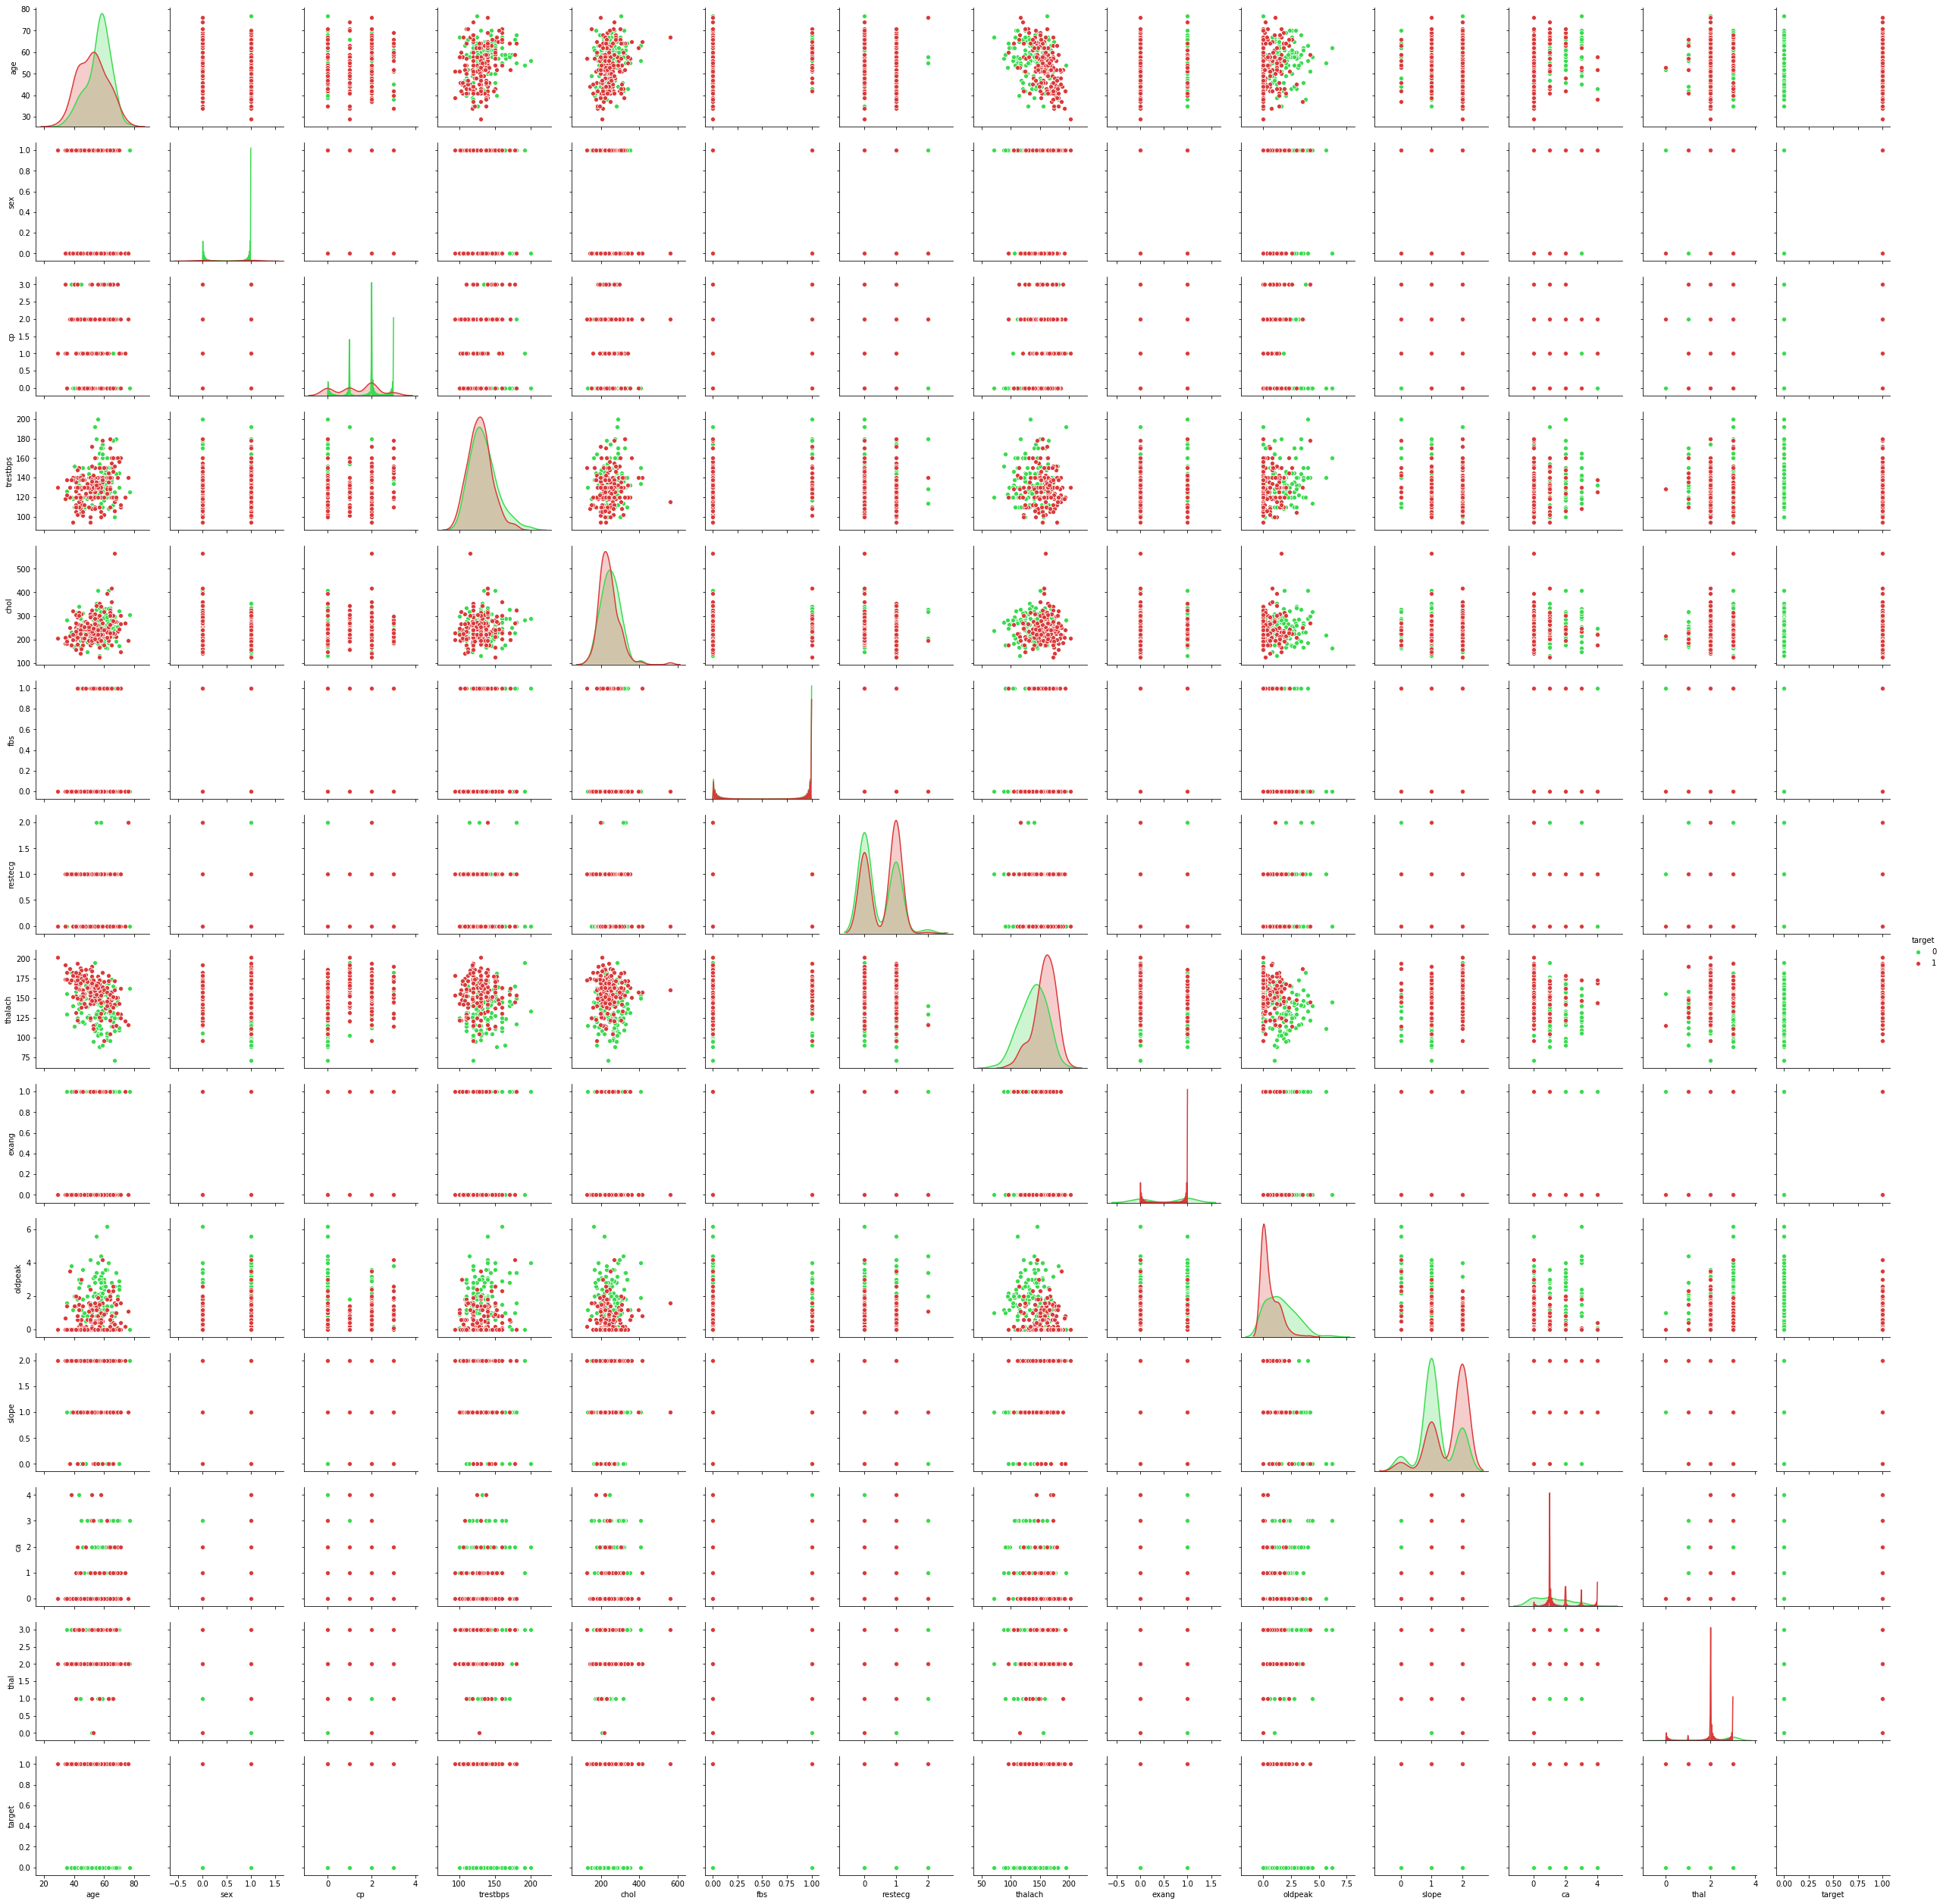

In [17]:
# pairplot
target_colors = ["#39db4d", "#db3939"]
sns.set_palette(target_colors)
sns.pairplot(heart, hue='target')
plt.show();

In [18]:
# count of males (1) and females (0)
heart.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

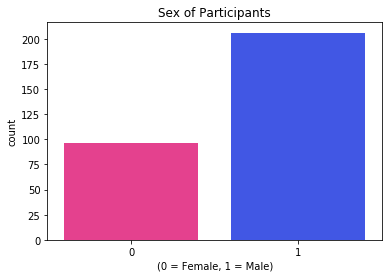

In [19]:
# plot of males (1) and females (0)
mf_colors = ["#FF268C", "#2643FF"]
sns.set_palette(mf_colors)
sns.countplot(heart.sex)
plt.title('Sex of Participants')
plt.xlabel('(0 = Female, 1 = Male)')
plt.show();

In [20]:
# count of disease (1) and no disease (0)
heart.target.value_counts()

1    164
0    138
Name: target, dtype: int64

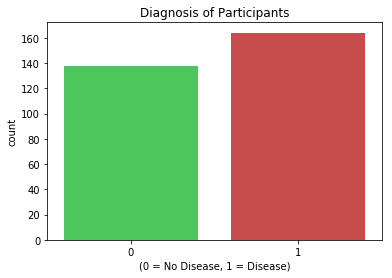

In [21]:
# plot of disease (1) and no disease (0)
target_colors = ["#39db4d", "#db3939"]
sns.set_palette(target_colors)
sns.countplot(heart.target)
plt.title("Diagnosis of Participants")
plt.xlabel('(0 = No Disease, 1 = Disease)')
plt.show();

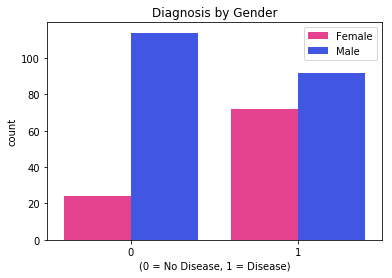

In [22]:
# plot of disease (1) and no disease (0) by sex
sns.set_palette(mf_colors)
sns.countplot(heart.target, hue=heart.sex)
plt.title("Diagnosis by Gender")
plt.xlabel('(0 = No Disease, 1 = Disease)')
plt.legend(["Female", "Male"])
plt.show();

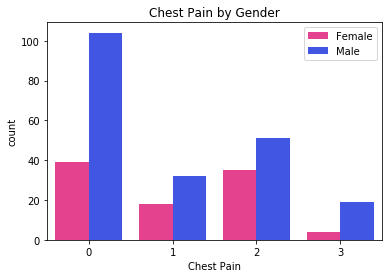

In [23]:
# plot cp (chest paint) by sex
sns.set_palette(mf_colors)
sns.countplot(heart.cp, hue=heart.sex)
plt.title("Chest Pain by Gender")
plt.xlabel("Chest Pain")
plt.legend(["Female", "Male"])
plt.show();

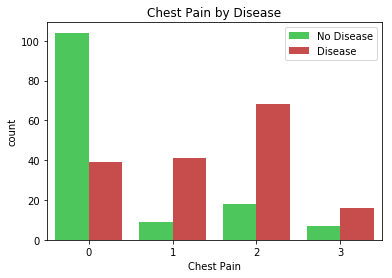

In [24]:
# plot cp (chest paint) by target
sns.set_palette(target_colors)
sns.countplot(heart.cp, hue=heart.target)
plt.title("Chest Pain by Disease")
plt.xlabel("Chest Pain")
plt.legend(["No Disease", "Disease"])
plt.show();

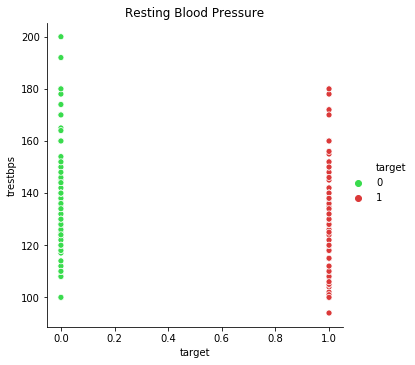

In [25]:
# plot trestbps (resting blood pressure)
sns.set_palette(target_colors)
sns.relplot(x="target", y="trestbps", hue="target", data=heart)
plt.title("Resting Blood Pressure");

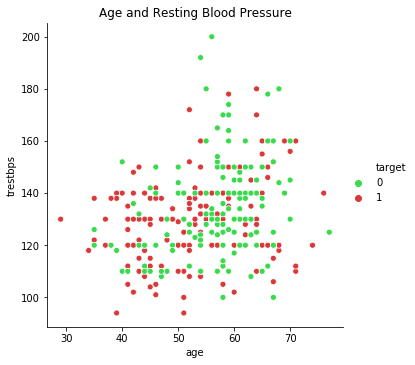

In [26]:
# plot trestbps (resting blood pressure) and age
sns.set_palette(target_colors)
sns.relplot(x="age", y="trestbps", hue="target", data=heart)
plt.title("Age and Resting Blood Pressure");

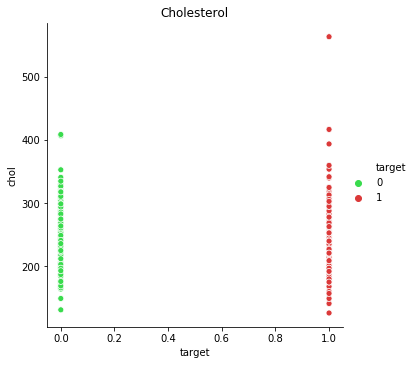

In [27]:
# plot chol (cholesterol)
sns.set_palette(target_colors)
sns.relplot(x="target", y="chol", hue="target", data=heart)
plt.title("Cholesterol");

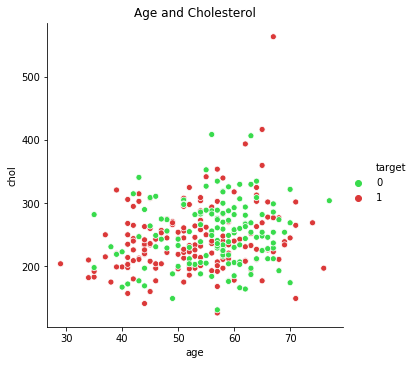

In [28]:
# plot chol (cholesterol) and age
sns.set_palette(target_colors)
sns.relplot(x="age", y="chol", hue="target", data=heart)
plt.title("Age and Cholesterol");

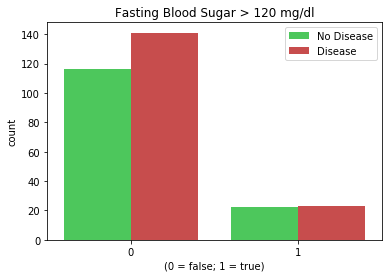

In [29]:
# plot fbs (fasting blood sugar) 
sns.set_palette(target_colors)
sns.countplot(heart.fbs, hue=heart.target)
plt.title("Fasting Blood Sugar > 120 mg/dl")
plt.xlabel("(0 = false; 1 = true)")
plt.legend(["No Disease", "Disease"])
plt.show()

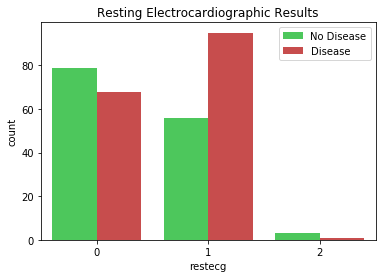

In [30]:
# plot restecg (resting electrocardiographic results) 
sns.set_palette(target_colors)
sns.countplot(heart.restecg, hue=heart.target)
plt.title("Resting Electrocardiographic Results")
plt.legend(["No Disease", "Disease"])
plt.show()

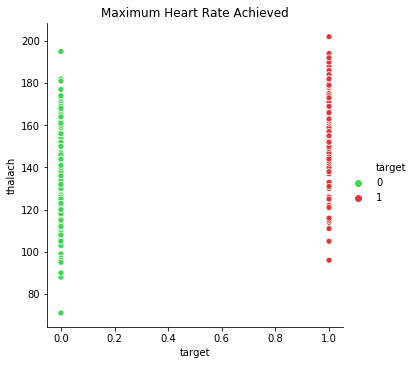

In [31]:
# plot thalach (maximum heart rate achieve)
sns.set_palette(target_colors)
sns.relplot(x="target", y="thalach", hue="target", data=heart)
plt.title("Maximum Heart Rate Achieved");

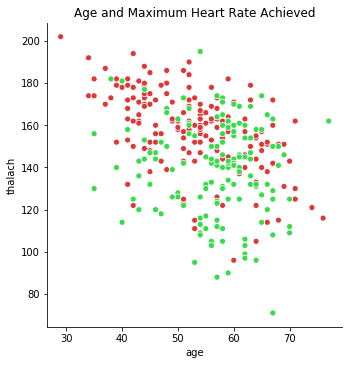

In [32]:
# plot thalach (maximum heart rate achieve) by age
sns.set_palette(target_colors)
g = sns.relplot(x="age", y="thalach", hue="target", data=heart, legend=False)
plt.title("Age and Maximum Heart Rate Achieved");

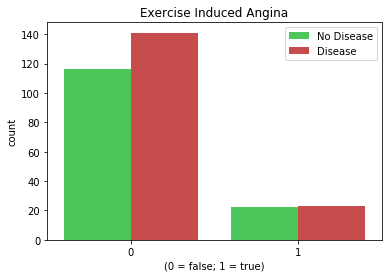

In [33]:
# plot exang (execrise induced angina)
sns.set_palette(target_colors)
sns.countplot(heart.fbs, hue=heart.target)
plt.title("Exercise Induced Angina")
plt.xlabel("(0 = false; 1 = true)")
plt.legend(["No Disease", "Disease"])
plt.show()

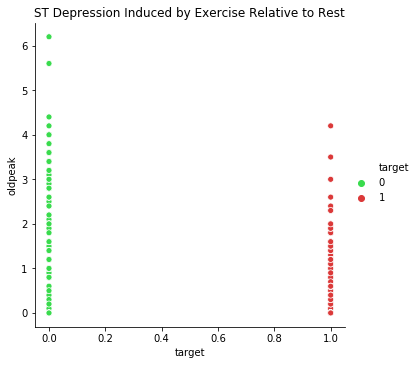

In [34]:
# plot oldpeak (ST depression induced by exercise)
sns.set_palette(target_colors)
sns.relplot(x="target", y="oldpeak", hue="target", data=heart)
plt.title("ST Depression Induced by Exercise Relative to Rest");

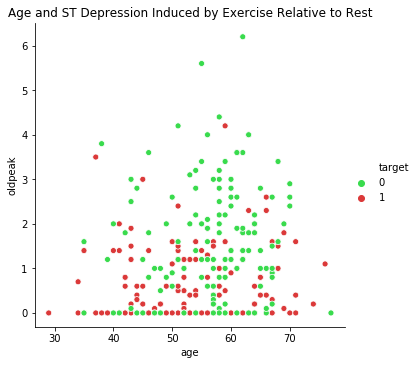

In [35]:
# plot oldpeak (ST depression induced by exercise) by age
sns.set_palette(target_colors)
sns.relplot(x="age", y="oldpeak", hue="target", data=heart, legend='full')
plt.title("Age and ST Depression Induced by Exercise Relative to Rest");

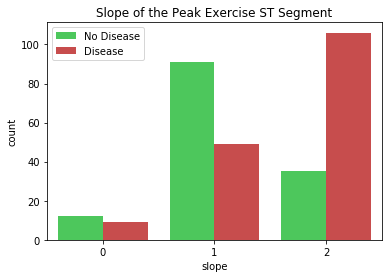

In [36]:
# plot slope
sns.set_palette(target_colors)
sns.countplot(heart.slope, hue=heart.target)
plt.title("Slope of the Peak Exercise ST Segment")
plt.legend(["No Disease", "Disease"])
plt.show()

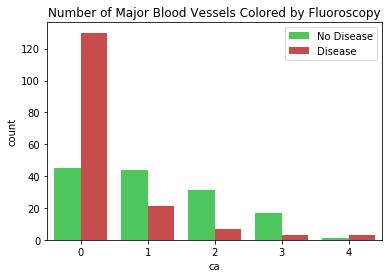

In [37]:
# plot ca (number of major blood vessels colored)
sns.set_palette(target_colors)
sns.countplot(heart.ca, hue=heart.target)
plt.title("Number of Major Blood Vessels Colored by Fluoroscopy")
plt.legend(["No Disease", "Disease"])
plt.show()

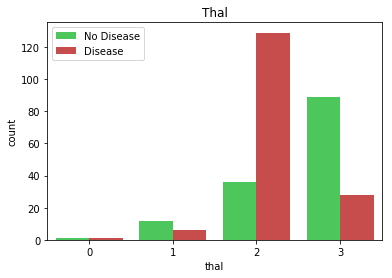

In [38]:
# plot thal
sns.set_palette(target_colors)
sns.countplot(heart.thal, hue=heart.target)
plt.title("Thal")
plt.legend(["No Disease", "Disease"])
plt.show()

### <b>Some General Observations about the Data</b>

* This is a small dataset with 302 observations.

* This is a fairly balanced dataset:<br/>
    -- 164 cases of heart disease (54.3%)<br/>
    -- 138 cases of no disease (45.7%)

* The male to female ratio is approximately 2:1.

* The dataset was relatively clean:<br/>
    -- one duplicate was removed<br/>
    -- attributes 'chol' and 'oldpeak' had a small number of potential outliers<br/>
    -- I opted to leave those in the dataset because I didn't have enough information to determine if those were data entry errors or actual values.
    
* The features are different scales, so I will need to scale the data.

* Features such as age, resting blood pressure, and cholesterol were not as indicative of heart disease as I was expecting. However, chest pain (cp) and the number major blood vessels colored by fluoroscopy (ca) seem to be more compelling features.

* This is a <i>supervised learning</i> problem since the model will be learning from the labels in the "target" column (0 = no disease; 1 = disease). It is also a <i>binary classification</i> problem since the goal is to train a model to predict a discrete value indicating whether a patient has heart disease or not

***